In [1]:
import exportCSV #exports data and metadata
import NPC 
import NPC_plotting
import Analyse_deformed
import json
import numpy as np
import csv

In [2]:
%matplotlib widget 

## Select config file for simulation settings

In [3]:
config = 'dynamics.yaml'

In [4]:
var = NPC.getVars(config) # Transform config file into a python dictionary 
print(json.dumps(var, indent = 4)) # Print var in an easily readable format 

{
    "rel": false,
    "rvar": {
        "rnew": null,
        "rsigma": null
    },
    "thetavar": {
        "thetanew": null,
        "thetasigma": null
    },
    "dvar": {
        "dnew": null,
        "dsigma": null
    },
    "symmet": 80,
    "kappa": null,
    "shiftsigma": null,
    "elliptvar": {
        "elliptnew": null,
        "elliptsigma": null
    },
    "mag": 0,
    "zmag": 0,
    "sigmamult": 0.2,
    "nConnect": 2,
    "damp": 1,
    "kr": 0.7,
    "tlast": 200,
    "step": 1
}


In [5]:
var["n"] = 1 # Number of NPCs to be simulated
NPCi = 0 # index out of n of NPC to be shown in any detail-plot or animation. 0-indexed.  
var["seed"] = 51234 #seed for reproducibility. Any number but 0
var["tlast"] = 20
var["symmet"] = 8

In [6]:
var["nup"] = ("nup107",)
var["term"] = ("C",)
var["model"] = "5a9q"

In [7]:
# # Variability parameters
var["mag"] = 20 # Magnitude of irregular variability. 0: No deformation, 15: Strong deformation
var["zmag"] = var["mag"]/2 # magnitude of offset in z. Not computed via springs 

In [8]:
NPCs = NPC.getNPCs(var) # Dictionary of all simulated NPCs

/home/maria/Documents/NPCpy/NPCpy/DeformNPC.py:260: RuntimeWarning: invalid value encountered in divide
  return K/Lscale
/home/maria/Documents/NPCpy/NPCpy/DeformNPC.py:260: RuntimeWarning: invalid value encountered in divide
  return K/Lscale


In [9]:
NPCscoords = NPC.getNPCcoords(NPCs, var) 

In [10]:
offset = 1.5 * np.mean(NPCs["rexp"]) # set offset to 1.5 * the expected NPC radius 
OffsetNPCs = NPC_plotting.OffsetNPCs(NPCscoords, offset)

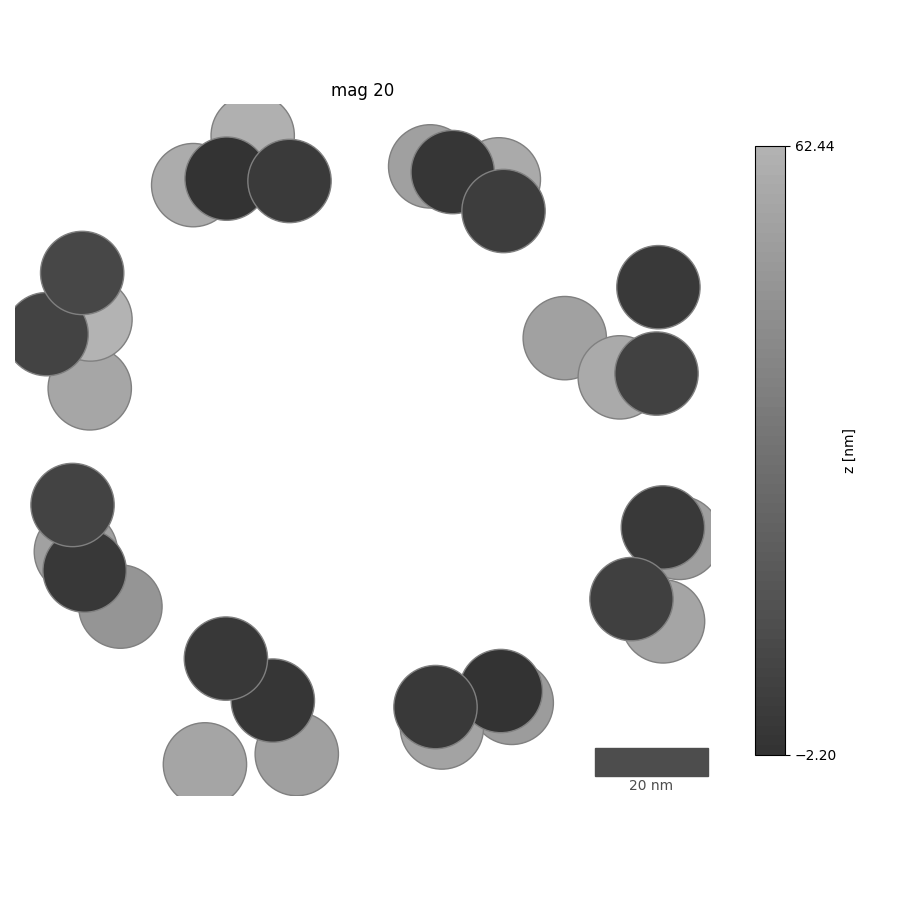

In [11]:
NPC_plotting.plotOverview(OffsetNPCs, NPCs, var, width = 9)